# Import Libraries

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


# Data Preprocessing

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)


Found 70295 files belonging to 38 classes.


In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [5]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [10]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [44]:
test_data = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [8]:
test_data = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 33 files belonging to 1 classes.


In [13]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [14]:
for x, y in train_data:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[156. 155. 160.]
   [165. 164. 169.]
   [170. 169. 174.]
   ...
   [133. 123. 122.]
   [134. 124. 123.]
   [114. 104. 103.]]

  [[156. 155. 160.]
   [163. 162. 167.]
   [168. 167. 172.]
   ...
   [122. 112. 111.]
   [130. 120. 119.]
   [110. 100.  99.]]

  [[165. 164. 169.]
   [170. 169. 174.]
   [172. 171. 176.]
   ...
   [127. 117. 116.]
   [143. 133. 132.]
   [128. 118. 117.]]

  ...

  [[179. 177. 178.]
   [179. 177. 178.]
   [179. 177. 178.]
   ...
   [137. 126. 124.]
   [133. 122. 120.]
   [128. 117. 115.]]

  [[175. 173. 174.]
   [178. 176. 177.]
   [180. 178. 179.]
   ...
   [132. 121. 119.]
   [131. 120. 118.]
   [130. 119. 117.]]

  [[170. 168. 169.]
   [174. 172. 173.]
   [178. 176. 177.]
   ...
   [127. 116. 114.]
   [129. 118. 116.]
   [132. 121. 119.]]]


 [[[136. 137. 155.]
   [136. 137. 155.]
   [136. 137. 155.]
   ...
   [110. 116. 140.]
   [107. 113. 137.]
   [104. 110. 134.]]

  [[137. 138. 156.]
   [136. 137. 155.]
   [135. 136. 154.]
   ...
   [107. 1

# Building Model

In [7]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25), # To avoid overfitting 
    Flatten(),
    Dense(units=1500, activation='relu'),
    Dropout(0.4), # To avoid overfitting 
    Dense(units=38, activation='softmax')
])


In [10]:
model = Sequential([
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(units=1024, activation='relu'),
    Dense(units=38, activation='softmax')
])

/home/axernox/PDD/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Training Model

In [21]:
train_his = model.fit(x=train_data, validation_data=valid_data, epochs=10)

Epoch 1/10


I0000 00:00:1720500706.357414  111983 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2167', 4 bytes spill stores, 4 bytes spill loads



2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.3831 - loss: 2.1851

I0000 00:00:1720500944.796279  113628 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2167', 4 bytes spill stores, 4 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3832 - loss: 2.1848

I0000 00:00:1720500948.685094  113726 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720500948.741698  113730 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720500948.813493  113724 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 408 bytes spill stores, 408 bytes spill loads

I0000 00:00:1720500966.866955  113882 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 112 bytes spill stores, 112 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 266s 118ms/step - accuracy: 0.3833 - loss: 2.1844 - val_accuracy: 0.8325 - val_loss: 0.5198
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 256s 117ms/step - accuracy: 0.8314 - loss: 0.5301 - val_accuracy: 0.9022 - val_loss: 0.3020
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 258s 117ms/step - accuracy: 0.9020 - loss: 0.2978 - val_accuracy: 0.9286 - val_loss: 0.2288
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 281s 128ms/step - accuracy: 0.9326 - loss: 0.2062 - val_accuracy: 0.9471 - val_loss: 0.1682
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 302s 138ms/step - accuracy: 0.9501 - loss: 0.1506 - val_accuracy: 0.9545 - val_loss: 0.1414
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 304s 138ms/step - accuracy: 0.9628 - loss: 0.1129 - val_accuracy: 0.9556 - val_loss: 0.1467
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 310s 141ms/step - accuracy: 0.9690 - loss: 0.0936 - val_accuracy: 0.9509 - val_loss: 0.1605
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 306s 140ms/step - accuracy: 0.9

# Model Evaluation 

In [23]:
train_loss, train_acc = model.evaluate(train_data)

2194/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9809 - loss: 0.0664

I0000 00:00:1720508606.174683  150709 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720508606.448647  150707 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1720508606.591985  150705 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 416 bytes spill stores, 416 bytes spill loads

I0000 00:00:1720508606.596014  150710 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 128 bytes spill stores, 128 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 0.9809 - loss: 0.0663


In [24]:
print(train_loss, train_acc)

0.062256813049316406 0.9820470809936523


In [25]:
val_loss, val_acc = model.evaluate(valid_data)

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9544 - loss: 0.1629


In [26]:
print(val_loss, val_acc)

0.15453127026557922 0.9549852013587952


# Saving Model

In [28]:
model.save("PlantDisPredModel.keras")

In [29]:
train_his.history

{'accuracy': [0.5920904874801636,
  0.8561775088310242,
  0.9114161729812622,
  0.9379898905754089,
  0.954150378704071,
  0.9643502235412598,
  0.9703961610794067,
  0.9757166504859924,
  0.9796286821365356,
  0.9820044040679932],
 'loss': [1.3833339214324951,
  0.45238324999809265,
  0.26920318603515625,
  0.18874703347682953,
  0.13959845900535583,
  0.1082753837108612,
  0.0902024507522583,
  0.07341723144054413,
  0.06448632478713989,
  0.05626700073480606],
 'val_accuracy': [0.8325176239013672,
  0.9021739363670349,
  0.9286364912986755,
  0.9470748901367188,
  0.9544730186462402,
  0.9556112289428711,
  0.9509446620941162,
  0.9666514992713928,
  0.9647734761238098,
  0.9549852013587952],
 'val_loss': [0.5198241472244263,
  0.30199140310287476,
  0.2287919968366623,
  0.1681676059961319,
  0.14142361283302307,
  0.14670810103416443,
  0.16047096252441406,
  0.10983216017484665,
  0.11823975294828415,
  0.15453124046325684]}

In [31]:
#Recording History

import json
with open("train_his.json", "w") as f:
    json.dump(train_his.history, f)

## Accuracy Visualisation 

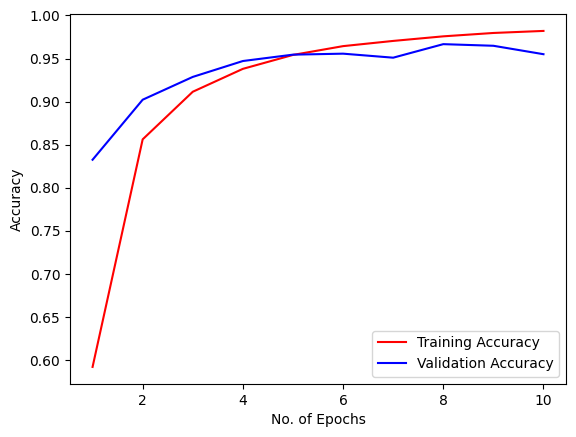

In [36]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,train_his.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,train_his.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Metrics for Model Evaluation

In [41]:
classname = valid_data.class_names
classname


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [45]:
pred = model.predict(test_data)
pred, pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step


(array([[9.9999988e-01, 7.3865593e-08, 3.9378939e-10, ..., 1.9099678e-16,
         4.4499321e-16, 3.6746341e-13],
        [1.0000000e+00, 1.7813487e-09, 2.1738408e-14, ..., 1.2734862e-19,
         5.6228088e-19, 5.8449734e-17],
        [1.0000000e+00, 3.4004784e-13, 1.4076730e-15, ..., 1.3483862e-22,
         1.1415401e-21, 3.2713743e-17],
        ...,
        [6.0796900e-08, 8.1176406e-11, 1.5810168e-06, ..., 5.3523119e-10,
         4.5914983e-10, 9.9996710e-01],
        [4.9203253e-10, 1.2149315e-13, 5.4257874e-09, ..., 5.1365273e-11,
         1.5078093e-11, 9.9999976e-01],
        [7.2778908e-11, 6.5711651e-11, 3.3332597e-09, ..., 1.7146758e-10,
         3.5241666e-08, 9.9986327e-01]], dtype=float32),
 (17572, 38))

In [46]:
pred_cat = tf.argmax(pred, axis=1)
pred_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [47]:
true_cat = tf.concat([y for x,y in test_data], axis=0)
true_cat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [49]:
y_true = tf.argmax(true_cat, axis=1)
y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_true, pred_cat, target_names=classname))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.99      0.94       504
                                 Apple___Black_rot       0.94      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.98      0.92      0.95       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

## Confusion Matrix

In [52]:
cm = confusion_matrix(y_true, pred_cat)
cm

array([[498,   0,   2, ...,   0,   0,   0],
       [  2, 492,   0, ...,   0,   0,   0],
       [  0,   0, 430, ...,   1,   0,   4],
       ...,
       [  0,   0,   0, ..., 490,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   1, 426]])

<Axes: >

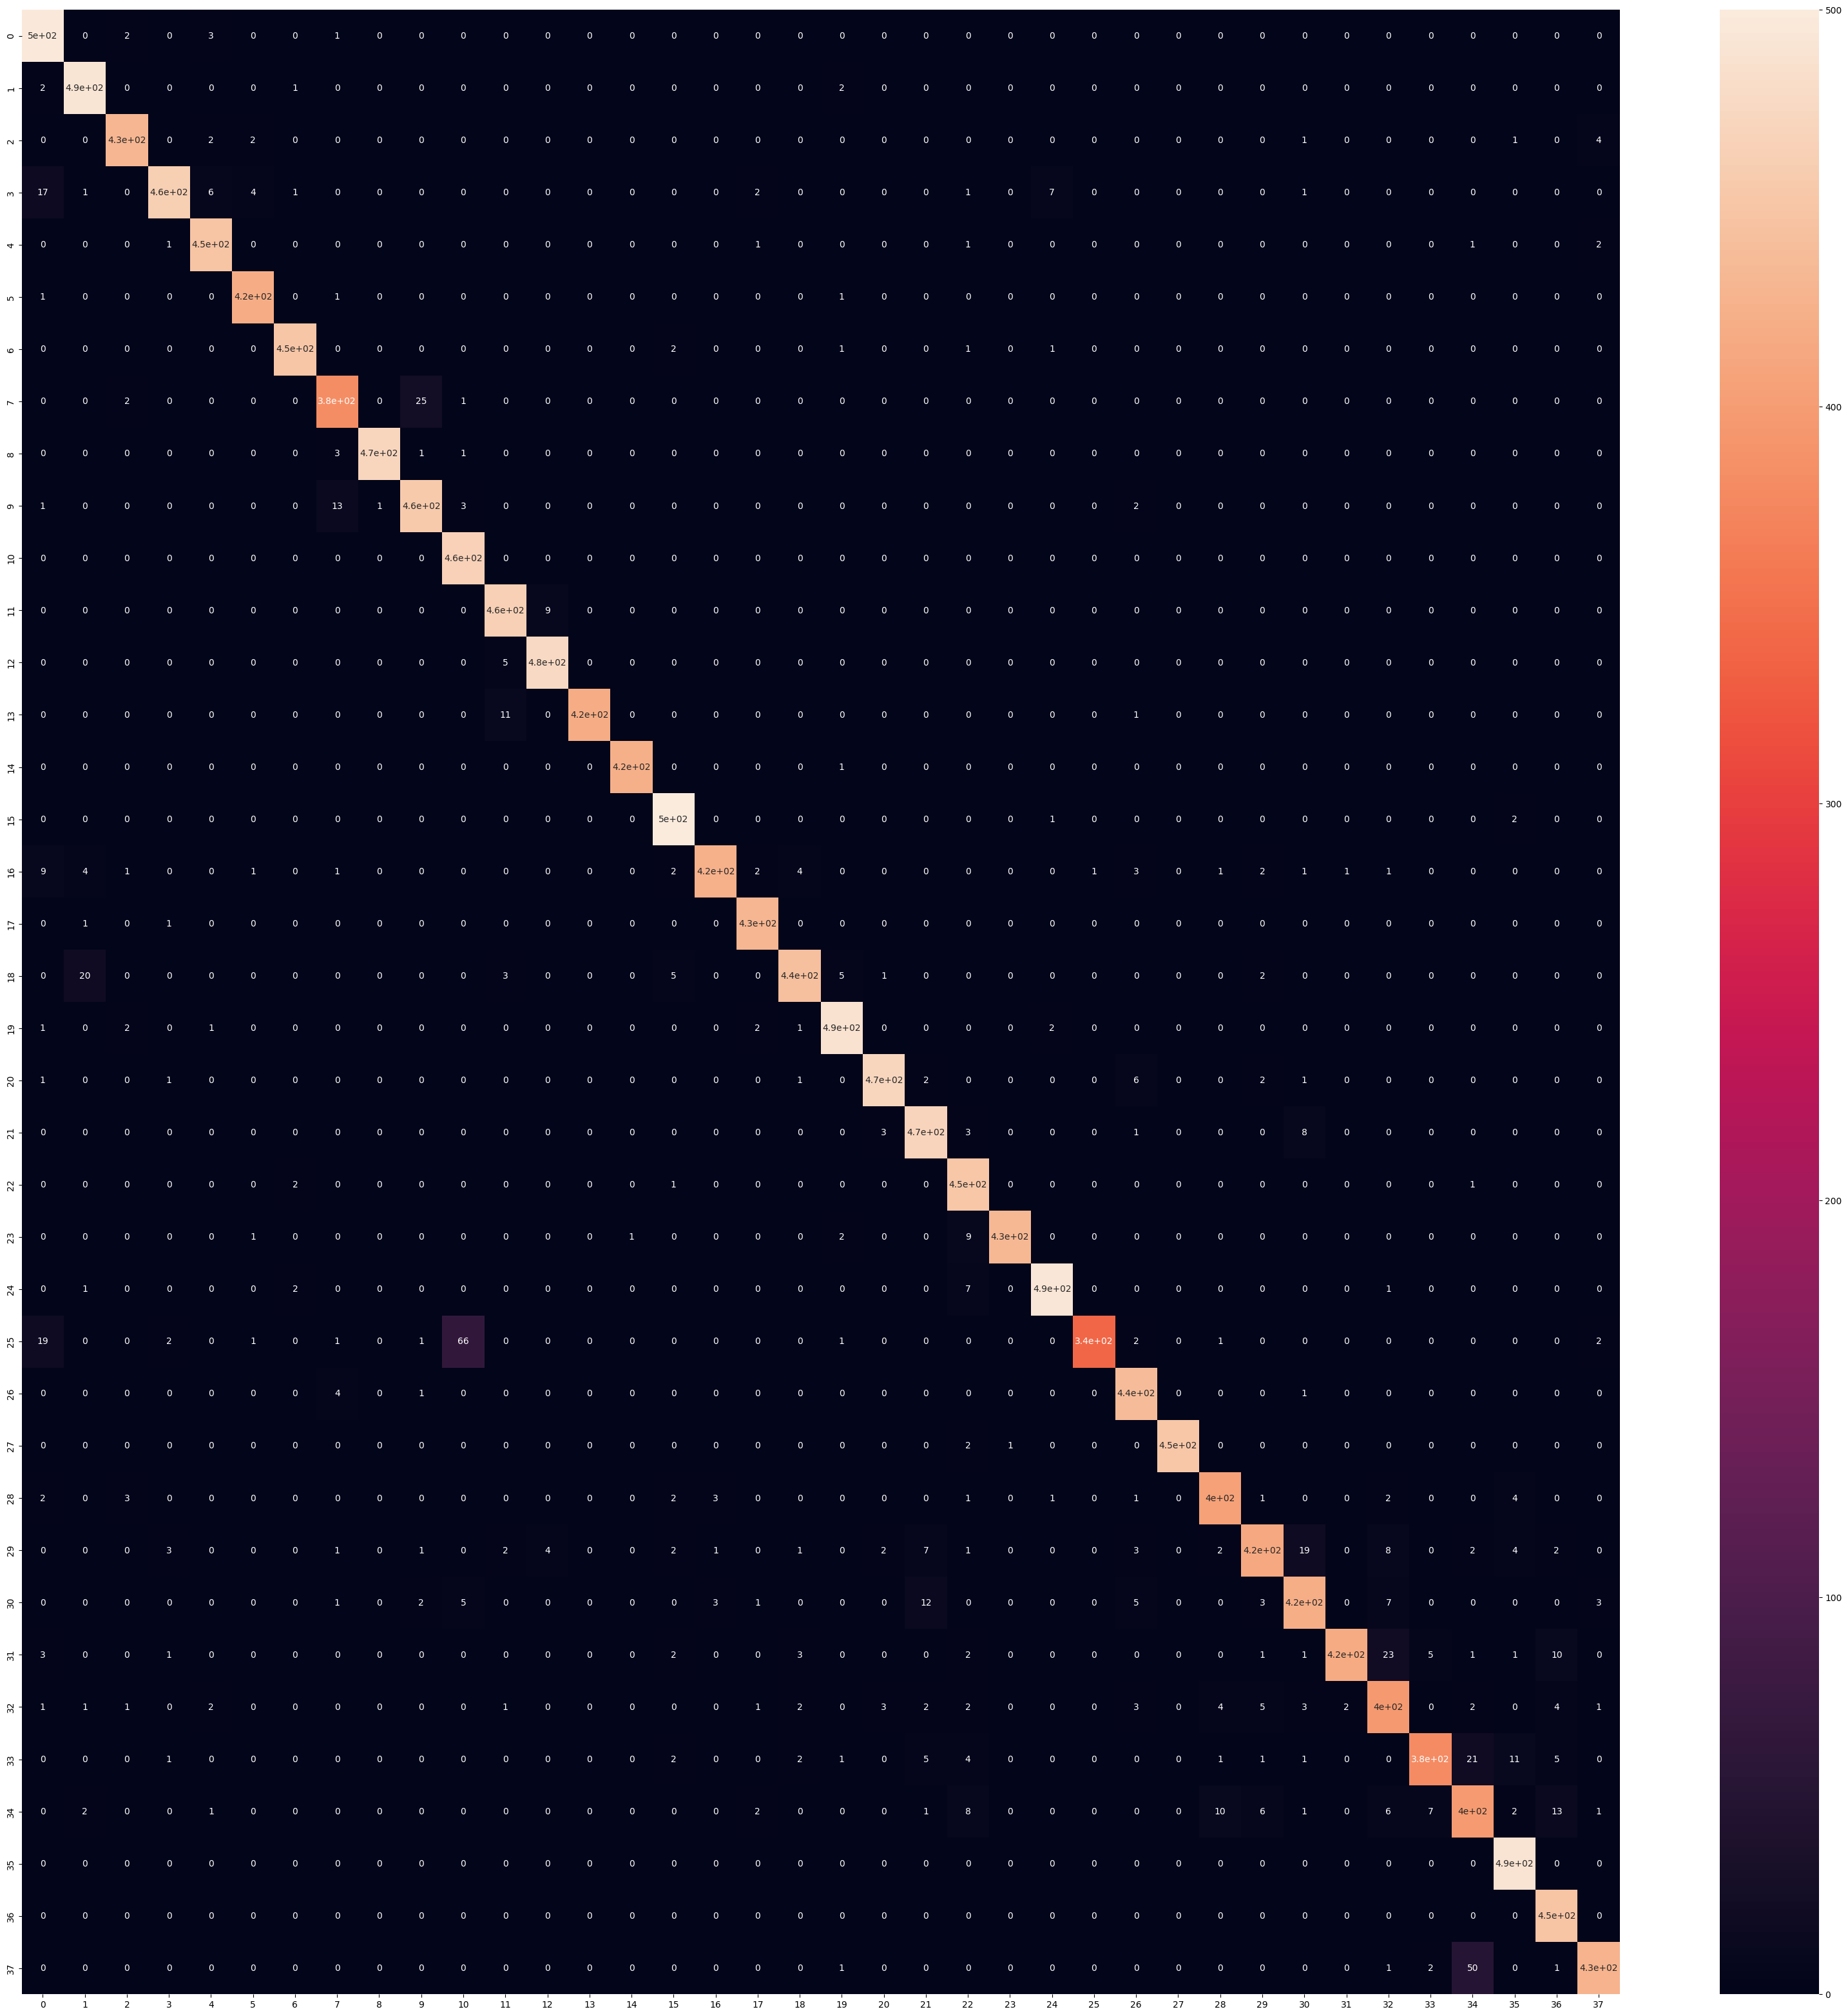

In [56]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True)